# Complete Notebook

## Importing Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from tensorflow import keras
from keras.layers import Input, Lambda, Dense, Flatten, Dropout
from keras.models import Model
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
%matplotlib inline 

## Initializing Parameters

In [3]:
IMAGE_SIZE = [256, 256, 3]
img_size = (256, 256)
num_classes = 2

train_path = '/kaggle/input/covid19-chest-xray-processed-dataset/Dataset/Train'
test_path = '/kaggle/input/covid19-chest-xray-processed-dataset/Dataset/Test'
val_path = '/kaggle/input/covid19-chest-xray-processed-dataset/Dataset/Val'

## Data Augmentation

In [4]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)
val_datagen = ImageDataGenerator(rescale = 1./255)




# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/kaggle/input/covid19-chest-xray-processed-dataset/Dataset/Train',
                                                 target_size = (256, 256),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')


test_set = test_datagen.flow_from_directory('/kaggle/input/covid19-chest-xray-processed-dataset/Dataset/Test',
                                            target_size = (256, 256),
                                            batch_size = 32,
                                            class_mode = 'categorical')


val_set = test_datagen.flow_from_directory('/kaggle/input/covid19-chest-xray-processed-dataset/Dataset/Val',
                                            target_size = (256, 256),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 3641 images belonging to 2 classes.
Found 455 images belonging to 2 classes.
Found 455 images belonging to 2 classes.


## Alexnet

## Building Model

In [5]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(256,256,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(2, activation='softmax')
])

In [6]:
model.compile(optimizer='SGD', loss="categorical_crossentropy", metrics=['accuracy'])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 96)        34944     
_________________________________________________________________
batch_normalization (BatchNo (None, 62, 62, 96)        384       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 30, 30, 96)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 256)       614656    
_________________________________________________________________
batch_normalization_1 (Batch (None, 30, 30, 256)       1024      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 384)       8

## Training

In [8]:
history = model.fit_generator(
  training_set,
  validation_data=val_set,
  epochs=100,
  steps_per_epoch=len(training_set),
  validation_steps=len(val_set)
)

Epoch 1/100
114/114 [==============================] - 277s 2s/step - loss: 1.4449 - accuracy: 0.8597 - val_loss: 0.7980 - val_accuracy: 0.4593
Epoch 2/100
114/114 [==============================] - 176s 2s/step - loss: 0.1854 - accuracy: 0.9558 - val_loss: 0.1492 - val_accuracy: 0.9429
Epoch 3/100
114/114 [==============================] - 177s 2s/step - loss: 0.1467 - accuracy: 0.9648 - val_loss: 0.1120 - val_accuracy: 0.9648
Epoch 4/100
114/114 [==============================] - 185s 2s/step - loss: 0.1158 - accuracy: 0.9703 - val_loss: 0.0793 - val_accuracy: 0.9758
Epoch 5/100
114/114 [==============================] - 186s 2s/step - loss: 0.0810 - accuracy: 0.9770 - val_loss: 0.1693 - val_accuracy: 0.9363
Epoch 6/100
114/114 [==============================] - 186s 2s/step - loss: 0.0601 - accuracy: 0.9796 - val_loss: 0.8181 - val_accuracy: 0.6879
Epoch 7/100
114/114 [==============================] - 186s 2s/step - loss: 0.0830 - accuracy: 0.9741 - val_loss: 0.0353 - val_accuracy:

## Testing

In [9]:
print("Evaluating on test data ....")
results = model.evaluate(test_set, batch_size=32)
print("test loss, test acc:", results)

Evaluating on test data ....
15/15 [==============================] - 39s 3s/step - loss: 0.0337 - accuracy: 0.9890
test loss, test acc: [0.03373200073838234, 0.9890109896659851]


## Plotting 

In [10]:
history.history

{'loss': [0.641840398311615,
  0.17346422374248505,
  0.11559242010116577,
  0.09245242178440094,
  0.0780797153711319,
  0.05962790548801422,
  0.07027120888233185,
  0.06828635931015015,
  0.059056464582681656,
  0.04766298830509186,
  0.045402608811855316,
  0.03798486664891243,
  0.04155910015106201,
  0.03947208449244499,
  0.03627992048859596,
  0.03447725996375084,
  0.031206073239445686,
  0.03081667050719261,
  0.028324449434876442,
  0.025092054158449173,
  0.02440464496612549,
  0.025257665663957596,
  0.021894440054893494,
  0.016818687319755554,
  0.017722435295581818,
  0.02083628624677658,
  0.020879391580820084,
  0.01802276074886322,
  0.01978851482272148,
  0.015431187115609646,
  0.016982918605208397,
  0.020707350224256516,
  0.018239891156554222,
  0.015585183165967464,
  0.016813049092888832,
  0.017820226028561592,
  0.013906598091125488,
  0.014752140268683434,
  0.01329086720943451,
  0.01693686470389366,
  0.011555035598576069,
  0.006395814474672079,
  0.0086

### Accuracy vs Epochs

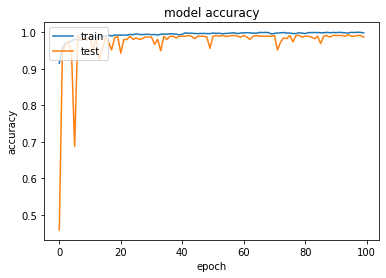

In [11]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


### Loss vs Epochs

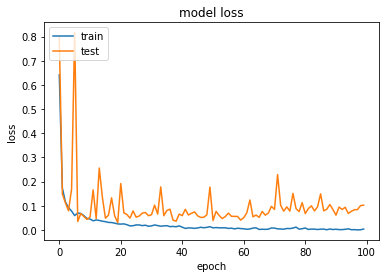

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()